In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.random.seed(42)

# Inlier data
n = 80
X = 2 * np.random.rand(n, 1)
y = 4 + 3 * X.squeeze() + np.random.randn(n)

# Add outliers
n_out = 10
X_out = 2 * np.random.rand(n_out, 1)
y_out = 25 + 10 * np.random.randn(n_out)

X_all = np.vstack([X, X_out])
y_all = np.concatenate([y, y_out])

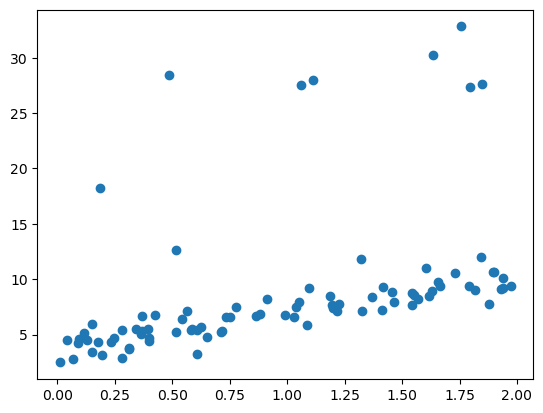

In [3]:
plt.scatter(X_all, y_all)

In [4]:
lr = LinearRegression()
lr.fit(X_all, y_all)

y_pred = lr.predict(X_all)

mse_all = mean_squared_error(y_all, y_pred)
print("MSE with outliers:", mse_all)

MSE with outliers: 32.77827854983664


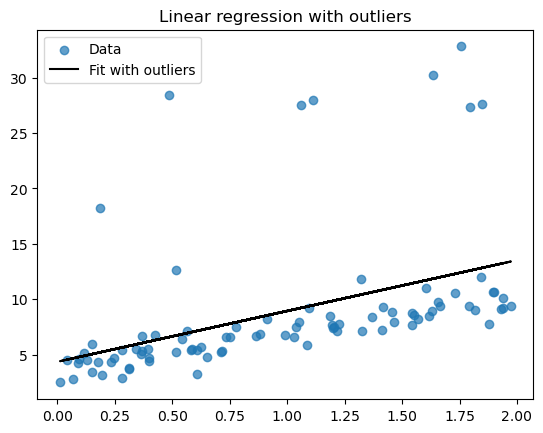

In [5]:
plt.scatter(X_all, y_all, alpha=0.7, label="Data")
plt.plot(X_all, y_pred, color="black", label="Fit with outliers")
plt.legend()
plt.title("Linear regression with outliers")
plt.show()

In [6]:
residuals = y_all - y_pred
z_scores = (residuals - residuals.mean()) / residuals.std()

mask = np.abs(z_scores) < 2.5   # threshold
X_z = X_all[mask]
y_z = y_all[mask]

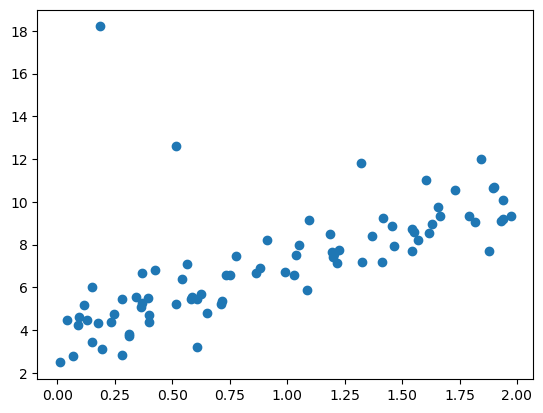

In [7]:
plt.scatter(X_z, y_z)

In [8]:
lr_z = LinearRegression()
lr_z.fit(X_z, y_z)

y_pred_z = lr_z.predict(X_z)
mse_z = mean_squared_error(y_z, y_pred_z)

print("MSE after Z-score outlier removal:", mse_z)

MSE after Z-score outlier removal: 3.816564541678638


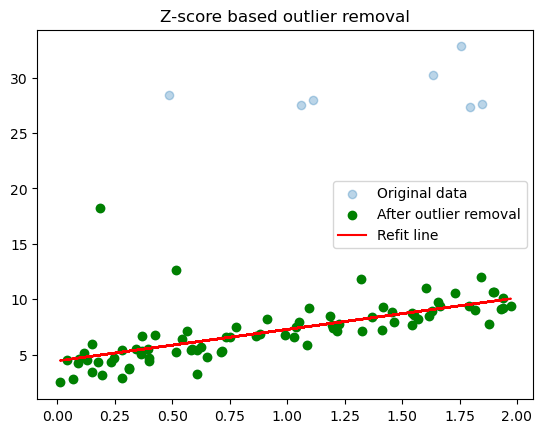

In [9]:
plt.scatter(X_all, y_all, alpha=0.3, label="Original data")
plt.scatter(X_z, y_z, color="green", label="After outlier removal")
plt.plot(X_z, y_pred_z, color="red", label="Refit line")
plt.legend()
plt.title("Z-score based outlier removal")
plt.show()

In [11]:
q1, q3 = np.percentile(y_all, [25, 75])
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

mask_iqr = (y_all >= lower) & (y_all <= upper)

X_iqr = X_all[mask_iqr]
y_iqr = y_all[mask_iqr]

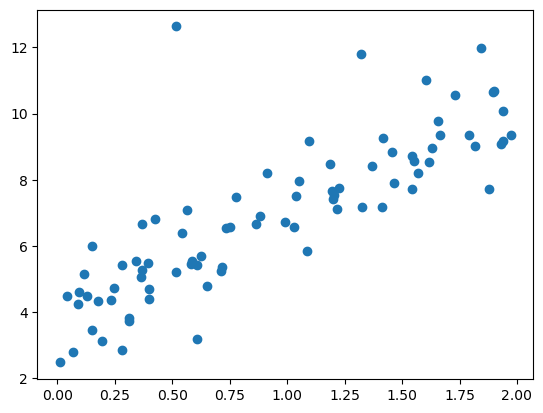

In [12]:
plt.scatter(X_iqr, y_iqr)

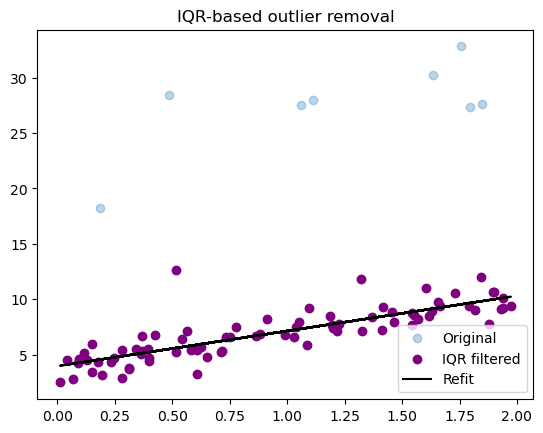

In [13]:
lr_iqr = LinearRegression()
lr_iqr.fit(X_iqr, y_iqr)

plt.scatter(X_all, y_all, alpha=0.3, label="Original")
plt.scatter(X_iqr, y_iqr, color="purple", label="IQR filtered")
plt.plot(X_iqr, lr_iqr.predict(X_iqr), color="black", label="Refit")
plt.legend()
plt.title("IQR-based outlier removal")
plt.show()